Data URL: <https://data.ontario.ca/dataset/1375bb00-6454-4d3e-a723-4ae9e849d655/resource/2aa6e2ce-40de-4910-a737-81762e014b0b/download/deaths_by_vac_status.csv>

This dataset reports the daily reported number of the 7-day moving average rates of Deaths involving covid-19 by vaccination status and by age group.

Data includes:
- Date on which the death occured
- Age group
- 7-day moving average of the last seven days of the death rate per 100,000 for those not fully vaccinated 
- 7-day moving average of the last seven days of the death rate per 100,000 for those fully vaccinated 
- 7-day moving average of the last seven days of the death rate per 100,000 for those vaccinated with at least one booster

Data range start: March 1, 2021
Data range end: November 12, 2024

Licence: Open Government Licence - Ontario

In [6]:
# import the libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [8]:
# Load 'Deaths Involving COVID-19 by Vaccination Status.csv' in a pandas dataframe 'df'
df = pd.read_csv('Deaths Involving COVID-19 by Vaccination Status.csv')
df.head(10)

,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
0,8858,2021-03-01T00:00:00,0-4yrs,0.0,0.0,0.00
1,8859,2021-03-01T00:00:00,5-11yrs,0.0,0.0,0.00
2,8860,2021-03-01T00:00:00,12-17yrs,0.0,0.0,0.00
3,8861,2021-03-01T00:00:00,18-39yrs,0.0,0.0,0.00
4,8862,2021-03-01T00:00:00,40-59yrs,0.0,0.0,0.02
5,8863,2021-03-01T00:00:00,60+,0.0,0.0,0.35
6,8864,2021-03-01T00:00:00,ALL,0.0,0.0,0.09
7,8865,2021-03-02T00:00:00,0-4yrs,0.0,0.0,0.00
8,8866,2021-03-02T00:00:00,5-11yrs,0.0,0.0,0.00
9,8867,2021-03-02T00:00:00,12-17yrs,0.0,0.0,0.00


In [84]:
df.tail(10)

,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
8882,17740,2024-11-09T00:00:00,40-59yrs,0.00,0.0,0.00
8883,17741,2024-11-09T00:00:00,60+,0.06,0.0,0.39
8884,17742,2024-11-09T00:00:00,ALL,0.03,0.0,0.02
8885,17743,2024-11-12T00:00:00,0-4yrs,0.00,0.0,0.00
8886,17744,2024-11-12T00:00:00,5-11yrs,0.00,0.0,0.00
8887,17745,2024-11-12T00:00:00,12-17yrs,0.00,0.0,0.00
8888,17746,2024-11-12T00:00:00,18-39yrs,0.00,0.0,0.00
8889,17747,2024-11-12T00:00:00,40-59yrs,0.00,0.0,0.00
8890,17748,2024-11-12T00:00:00,60+,0.05,0.0,0.30
8891,17749,2024-11-12T00:00:00,ALL,0.02,0.0,0.01


In [86]:
df.describe()

,_id,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
count,8892.00000,8892.000000,8892.000000,8892.000000
mean,13303.50000,0.024245,0.023695,0.261889
std,2567.04363,0.067461,0.109072,1.218294
min,8858.00000,0.000000,0.000000,0.000000
25%,11080.75000,0.000000,0.000000,0.000000
50%,13303.50000,0.000000,0.000000,0.000000
75%,15526.25000,0.010000,0.000000,0.030000
max,17749.00000,0.810000,1.970000,18.330000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           8892 non-null   int64  
 1   date                          8892 non-null   object 
 2   age_group                     8892 non-null   object 
 3   deaths_boost_vac_rate_7ma     8892 non-null   float64
 4   deaths_full_vac_rate_7ma      8892 non-null   float64
 5   deaths_not_full_vac_rate_7ma  8892 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 416.9+ KB


In [22]:
# Distributions
# sns.scatterplot(x='age_group', y='deaths_boost_vac_rate_7ma', data=df)

def scatterplot_variables(df, variables):
    plt.figure(figsize=(15, 4))  # Set figure size for three plots
    
    for i, (xvar, yvar) in enumerate(variables, start=1):
        plt.subplot(1, 3, i)  # Create subplots in 1 row, 3 columns
        sns.scatterplot(data=df, x=xvar, y=yvar)
        plt.title(f"{xvar} vs {yvar}")  # Optional: Add a title
        
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

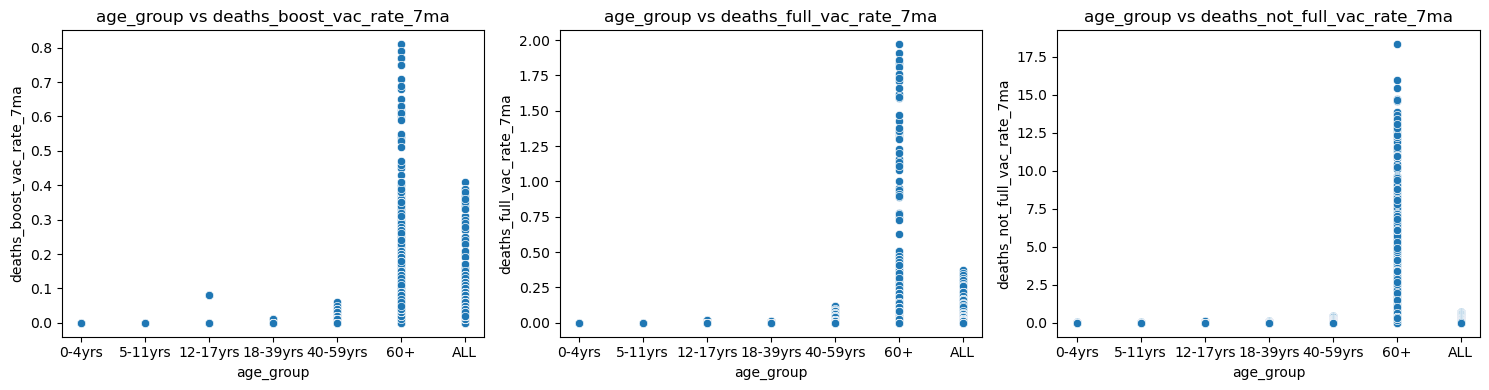

In [24]:
scatterplot_variables(df, [('age_group', 'deaths_boost_vac_rate_7ma'),('age_group', 'deaths_full_vac_rate_7ma'),('age_group', 'deaths_not_full_vac_rate_7ma')])

In [106]:
def plotvariable(df, variable):
    plt.figure(figsize=(16,4))
    # histogram
    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha=0.5)

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df, x=variable)
    plt.show()

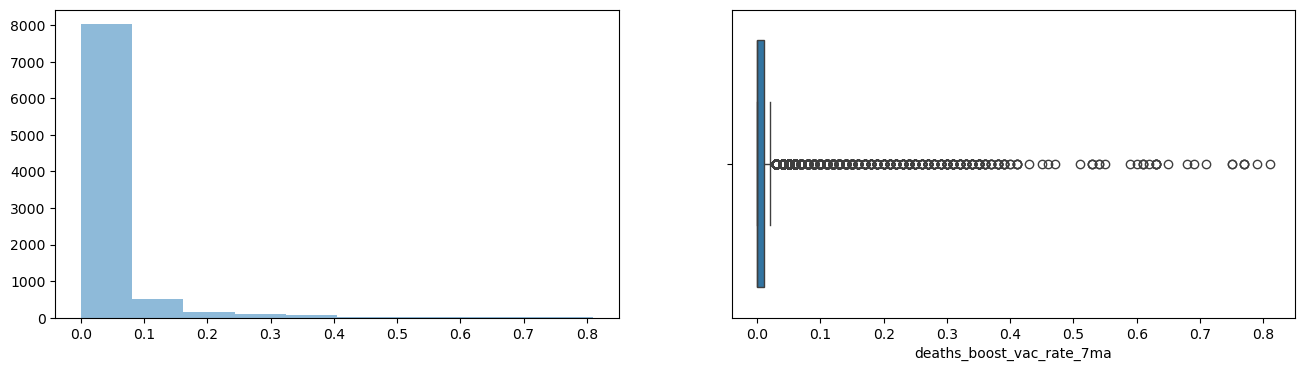

In [108]:
plotvariable(df, 'deaths_boost_vac_rate_7ma')

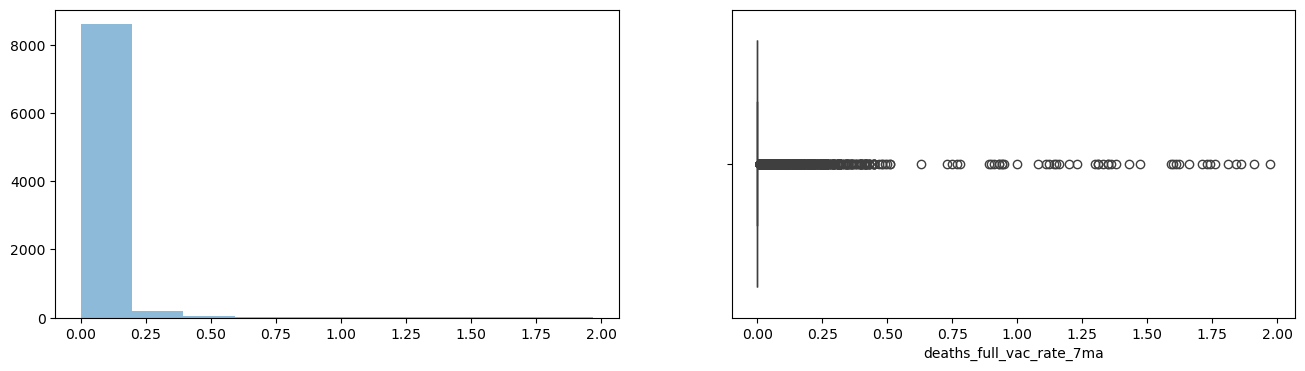

In [110]:
plotvariable(df, 'deaths_full_vac_rate_7ma')

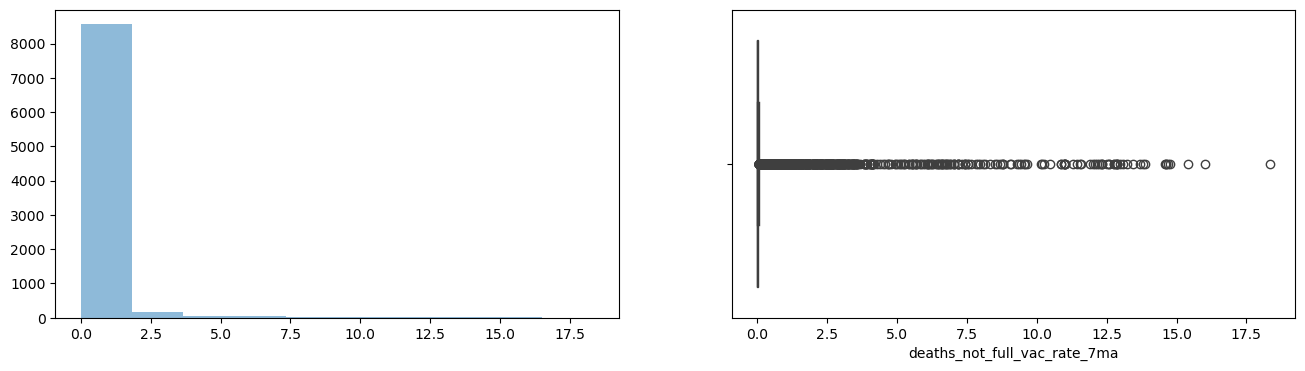

In [112]:
plotvariable(df, 'deaths_not_full_vac_rate_7ma')

In [126]:
def find_boundaries(df, variables):
    # lets find the IOR (Inter quantile range)
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q1+1.5*IQR

    return lower_boundary, upper_boundary

In [128]:
lower_deaths_boost_vac_rate_7ma, upper_deaths_boost_vac_rate_7ma = find_boundaries(df, 'deaths_boost_vac_rate_7ma')
print('upper limit for deaths_boost_vac_rate_7ma is', upper_deaths_boost_vac_rate_7ma)
print('lower limit for deaths_boost_vac_rate_7ma is', lower_deaths_boost_vac_rate_7ma)

upper limit for deaths_boost_vac_rate_7ma is 0.015
lower limit for deaths_boost_vac_rate_7ma is -0.015


In [130]:
lower_deaths_full_vac_rate_7ma, upper_deaths_full_vac_rate_7ma = find_boundaries(df, 'deaths_full_vac_rate_7ma')
print('upper limit for deaths_full_vac_rate_7ma is', upper_deaths_full_vac_rate_7ma)
print('lower limit for deaths_full_vac_rate_7ma is', lower_deaths_full_vac_rate_7ma)

upper limit for deaths_full_vac_rate_7ma is 0.0
lower limit for deaths_full_vac_rate_7ma is 0.0


In [132]:
lower_deaths_not_full_vac_rate_7ma, upper_deaths_not_full_vac_rate_7ma = find_boundaries(df, 'deaths_not_full_vac_rate_7ma')
print('upper limit for deaths_not_full_vac_rate_7ma is', upper_deaths_not_full_vac_rate_7ma)
print('lower limit for deaths_not_full_vac_rate_7ma is', lower_deaths_not_full_vac_rate_7ma)

upper limit for deaths_not_full_vac_rate_7ma is 0.045
lower limit for deaths_not_full_vac_rate_7ma is -0.045


In [136]:
# Removing / trimming the outliers

outliers_deaths_boost_vac_rate_7ma = np.where(df['deaths_boost_vac_rate_7ma'] > upper_deaths_boost_vac_rate_7ma, True,
                                             np.where(df['deaths_boost_vac_rate_7ma'] < lower_deaths_boost_vac_rate_7ma, True, False))

In [142]:
outliers_deaths_full_vac_rate_7ma = np.where(df['deaths_full_vac_rate_7ma'] > upper_deaths_full_vac_rate_7ma, True,
                                             np.where(df['deaths_full_vac_rate_7ma'] < lower_deaths_full_vac_rate_7ma, True, False))

In [144]:
outliers_deaths_not_full_vac_rate_7ma = np.where(df['deaths_not_full_vac_rate_7ma'] > upper_deaths_not_full_vac_rate_7ma, True,
                                             np.where(df['deaths_not_full_vac_rate_7ma'] < lower_deaths_not_full_vac_rate_7ma, True, False))

In [138]:
outliers_deaths_boost_vac_rate_7ma

array([False, False, False, ..., False,  True,  True])

In [146]:
outliers_deaths_full_vac_rate_7ma

array([False, False, False, ..., False, False, False])

In [148]:
outliers_deaths_not_full_vac_rate_7ma

array([False, False, False, ..., False,  True, False])

In [140]:
df.shape

(8892, 6)

In [230]:
engineered_df_boost = df.loc[~(outliers_deaths_boost_vac_rate_7ma),] 

In [232]:
engineered_df_boost.shape

(6982, 6)

In [234]:
engineered_df_full = df.loc[~(outliers_deaths_full_vac_rate_7ma),] 

In [236]:
engineered_df_full.shape

(6675, 6)

In [238]:
engineered_df_not_full = df.loc[~(outliers_deaths_not_full_vac_rate_7ma),] 

In [240]:
engineered_df_not_full.shape

(6912, 6)

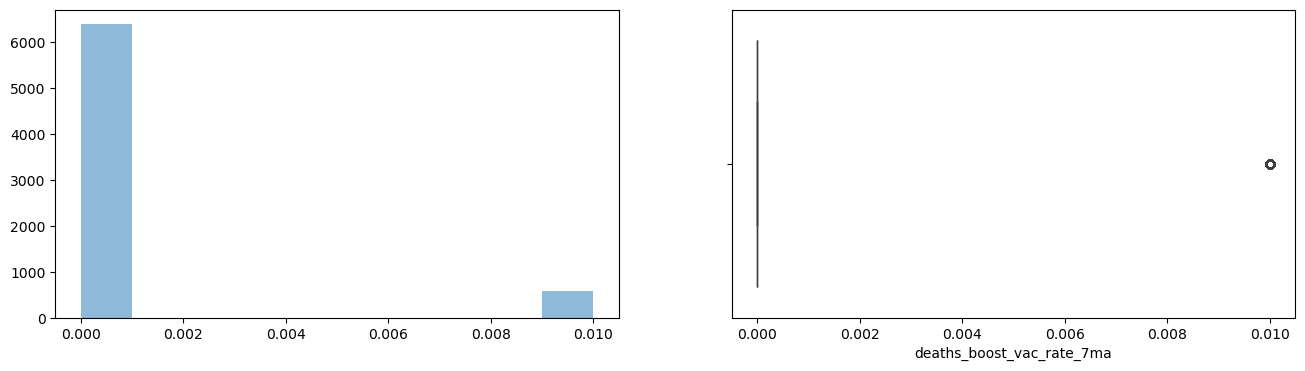

In [244]:
plotvariable(engineered_df_boost, 'deaths_boost_vac_rate_7ma')

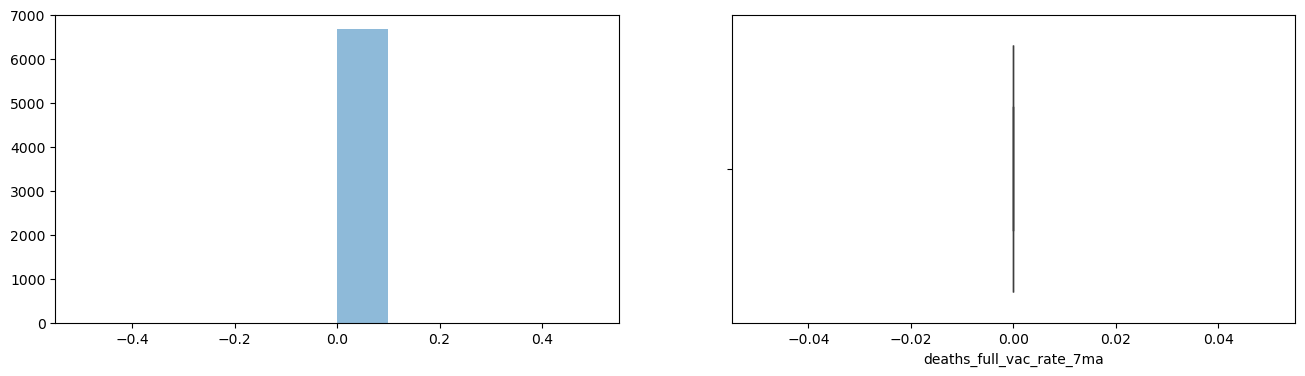

In [246]:
plotvariable(engineered_df_full, 'deaths_full_vac_rate_7ma')

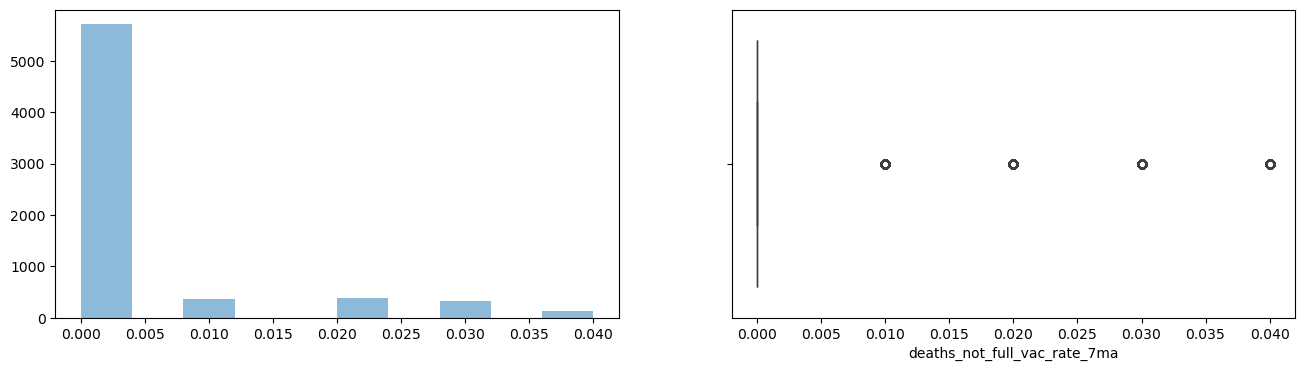

In [248]:
plotvariable(engineered_df_not_full, 'deaths_not_full_vac_rate_7ma')

In [256]:
# capping variables at upper and lower limits

df['deaths_boost_vac_rate_7ma'] = np.where(df['deaths_boost_vac_rate_7ma'] > upper_deaths_boost_vac_rate_7ma, upper_deaths_boost_vac_rate_7ma,
                                          np.where(df['deaths_boost_vac_rate_7ma'] < lower_deaths_boost_vac_rate_7ma, lower_deaths_boost_vac_rate_7ma, df['deaths_boost_vac_rate_7ma']))

In [258]:
df['deaths_full_vac_rate_7ma'] = np.where(df['deaths_full_vac_rate_7ma'] > upper_deaths_full_vac_rate_7ma, upper_deaths_full_vac_rate_7ma,
                                          np.where(df['deaths_full_vac_rate_7ma'] < lower_deaths_full_vac_rate_7ma, lower_deaths_full_vac_rate_7ma, df['deaths_full_vac_rate_7ma']))

In [262]:
df['deaths_not_full_vac_rate_7ma'] = np.where(df['deaths_not_full_vac_rate_7ma'] > upper_deaths_not_full_vac_rate_7ma, upper_deaths_not_full_vac_rate_7ma,
                                          np.where(df['deaths_not_full_vac_rate_7ma'] < lower_deaths_not_full_vac_rate_7ma, lower_deaths_not_full_vac_rate_7ma, df['deaths_not_full_vac_rate_7ma']))

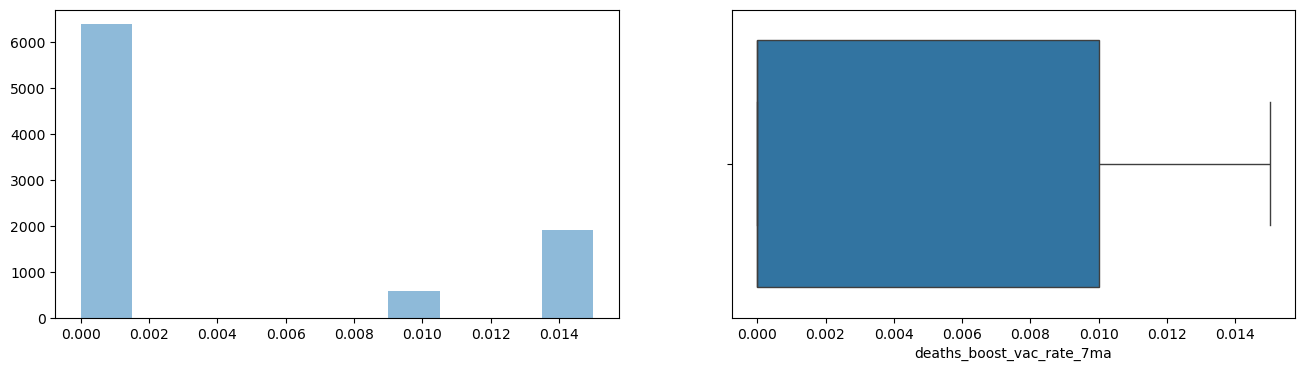

In [254]:
plotvariable(df, 'deaths_boost_vac_rate_7ma')

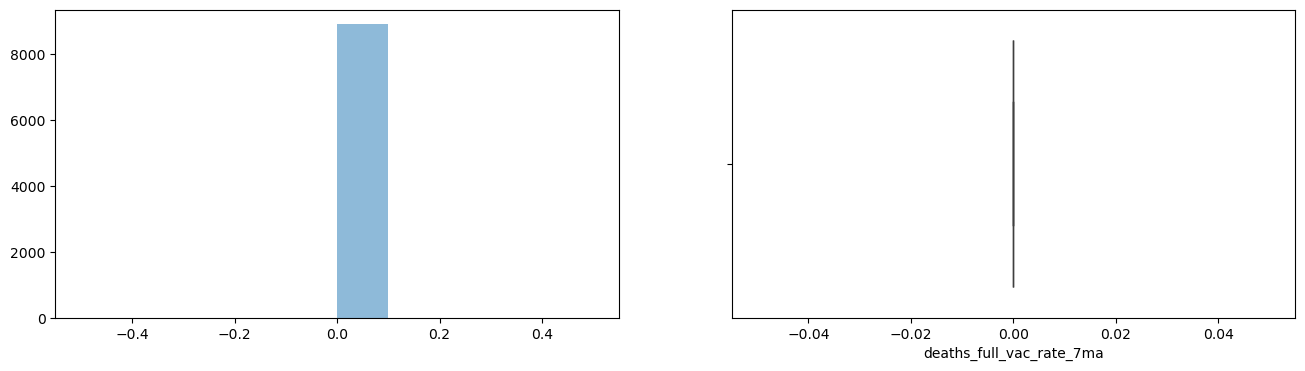

In [260]:
plotvariable(df, 'deaths_full_vac_rate_7ma')

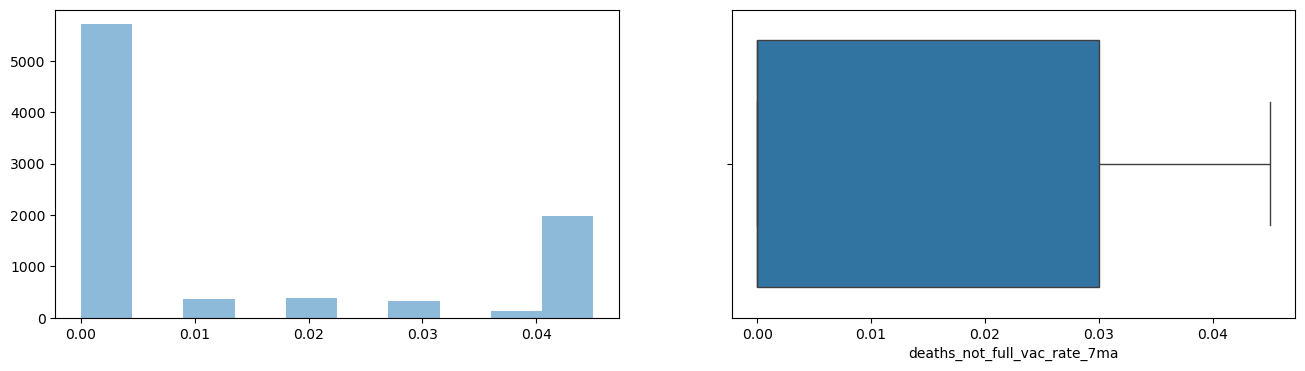

In [264]:
plotvariable(df, 'deaths_not_full_vac_rate_7ma')

In [266]:
# save the cleaned dataframe as 'cleaned_deaths_involving_covid-19_by_vaccination_status_df'
df.to_csv('cleaned_deaths_involving_covid-19_by_vaccination_status_df.csv', index=None)

In [28]:
new = pd.read_csv('cleaned_deaths_involving_covid-19_by_vaccination_status_df.csv')
new

,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
0,8858,2021-03-01T00:00:00,0-4yrs,0.000,0.0,0.000
1,8859,2021-03-01T00:00:00,5-11yrs,0.000,0.0,0.000
2,8860,2021-03-01T00:00:00,12-17yrs,0.000,0.0,0.000
3,8861,2021-03-01T00:00:00,18-39yrs,0.000,0.0,0.000
4,8862,2021-03-01T00:00:00,40-59yrs,0.000,0.0,0.020
...,...,...,...,...,...,...
8887,17745,2024-11-12T00:00:00,12-17yrs,0.000,0.0,0.000
8888,17746,2024-11-12T00:00:00,18-39yrs,0.000,0.0,0.000
8889,17747,2024-11-12T00:00:00,40-59yrs,0.000,0.0,0.000
8890,17748,2024-11-12T00:00:00,60+,0.015,0.0,0.045


In [272]:
new.describe()

,_id,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
count,8892.00000,8892.000000,8892.0,8892.000000
mean,13303.50000,0.003884,0.0,0.012973
std,2567.04363,0.006314,0.0,0.018981
min,8858.00000,0.000000,0.0,0.000000
25%,11080.75000,0.000000,0.0,0.000000
50%,13303.50000,0.000000,0.0,0.000000
75%,15526.25000,0.010000,0.0,0.030000
max,17749.00000,0.015000,0.0,0.045000


In [274]:
df['age_group'].unique()

array(['0-4yrs', '5-11yrs', '12-17yrs', '18-39yrs', '40-59yrs', '60+',
       'ALL'], dtype=object)

In [276]:
df['deaths_boost_vac_rate_7ma'].unique()

array([0.   , 0.015, 0.01 ])

In [278]:
df['deaths_full_vac_rate_7ma'].unique()

array([0.])

In [280]:
df['deaths_not_full_vac_rate_7ma'].unique()

array([0.   , 0.02 , 0.045, 0.04 , 0.03 , 0.01 ])

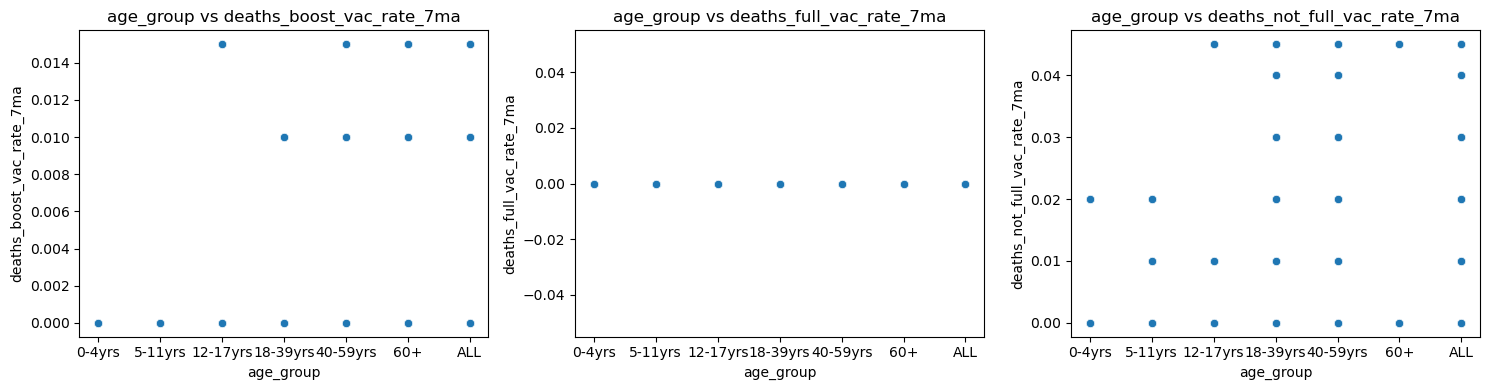

In [30]:
scatterplot_variables(new, [('age_group', 'deaths_boost_vac_rate_7ma'),('age_group', 'deaths_full_vac_rate_7ma'),('age_group', 'deaths_not_full_vac_rate_7ma')])